In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import opendatasets as od
%matplotlib inline

In [2]:
od.download('https://www.kaggle.com/datasets/mohansacharya/graduate-admissions/code')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions


100%|██████████| 9.64k/9.64k [00:00<?, ?B/s]

In [3]:
os.listdir('graduate-admissions')

df = pd.read_csv('graduate-admissions/Admission_Predict_Ver1.1.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.Research.value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [8]:
df.drop(columns=['Serial No.'], inplace= True)

In [9]:
X=df.iloc[:,0:-1]

In [10]:
Y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(15, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='linear'))

In [47]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 7)                 56        
                                                                 
 dense_16 (Dense)            (None, 15)                120       
                                                                 
 dense_17 (Dense)            (None, 30)                480       
                                                                 
 dense_18 (Dense)            (None, 1)                 31        
                                                                 
Total params: 687
Trainable params: 687
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [49]:
history= model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 1s 49ms/step - loss: 0.6210 - val_loss: 0.4839
Epoch 2/150
10/10 [==============================] - 0s 11ms/step - loss: 0.3796 - val_loss: 0.2776
Epoch 3/150
10/10 [==============================] - 0s 15ms/step - loss: 0.1960 - val_loss: 0.1225
Epoch 4/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0694 - val_loss: 0.0313
Epoch 5/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0152 - val_loss: 0.0114
Epoch 6/150
10/10 [==============================] - 0s 10ms/step - loss: 0.0130 - val_loss: 0.0146
Epoch 7/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0123 - val_loss: 0.0111
Epoch 8/150
10/10 [==============================] - 0s 17ms/step - loss: 0.0095 - val_loss: 0.0107
Epoch 9/150
10/10 [==============================] - 0s 11ms/step - loss: 0.0092 - val_loss: 0.0107
Epoch 10/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0090 - val_loss: 0.0100
Ep

In [50]:
pred= model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [51]:
from sklearn.metrics import r2_score

r2_score(Y_test, pred)

0.8262993954922379

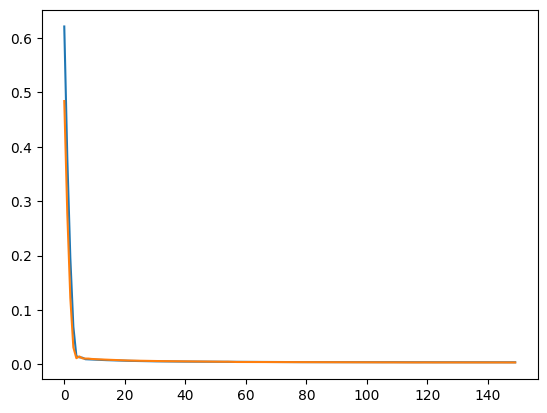

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
